In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn

seaborn.set()
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
# Notebook Variables
dataset_name = "email-Eu-core"
dataset_filepath = "%s.txt" % (dataset_name)
dataset_address = "https://snap.stanford.edu/data/email-Eu-core.txt.gz"

In [4]:
# Download and Extract Dataset

import urllib.request
import gzip
import shutil
import os

filename, header = urllib.request.urlretrieve(dataset_address)

with gzip.open(filename, "rb") as f_in:
    with open(dataset_filepath, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)
        
os.remove(filename)

In [5]:
# Import Dataset
G=nx.read_edgelist(dataset_filepath, nodetype=int)
# to import as directed graph
# G=nx.read_edgelist(dataset_filepath, nodetype=int, create_using=nx.DiGraph())
print(G.number_of_nodes())
print(G.number_of_edges())

1005
16706


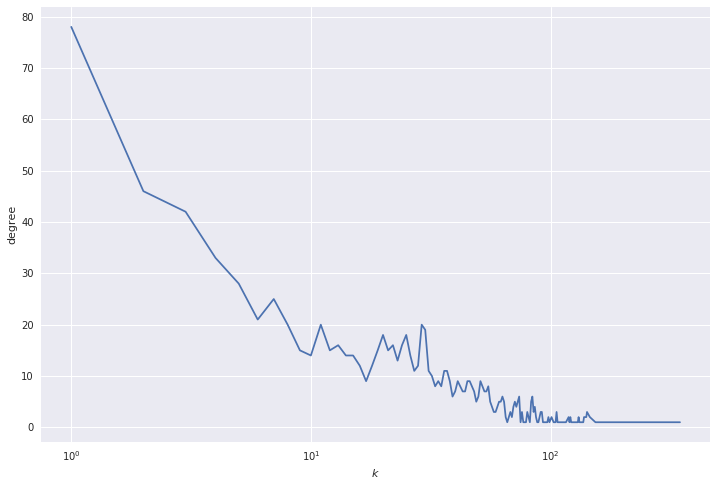

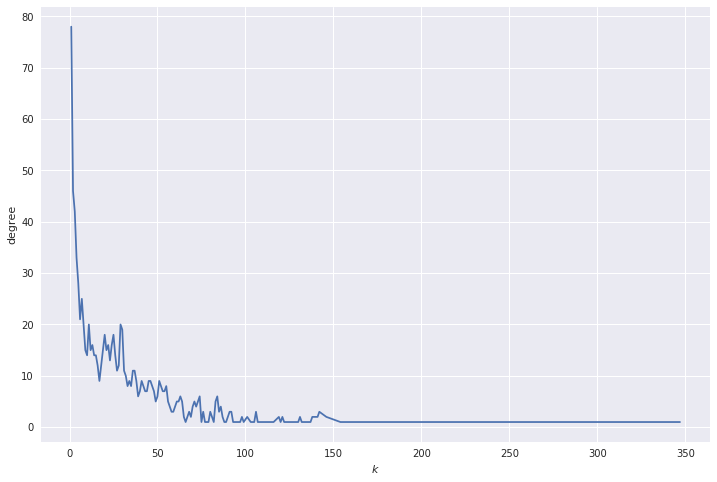

In [6]:
# Degree Distribution
def plot_dist(x, y, xlabel, ylabel, log = False):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if log:
        ax.set_xscale("log")
    plt.show()

def plot_degree_dist(G):
    degree_sequence=list(dict(nx.degree(G)).values()) # degree sequence

    degree_hist = dict((i, degree_sequence.count(i)) for i in set(degree_sequence))

    x = list(degree_hist.keys())
    y = list(degree_hist.values())
    x, y = zip(*sorted(zip(x, y)))

    plot_dist(x, y, "$k$", "degree", True)
    plot_dist(x, y, "$k$", "degree", False)
    return degree_hist

degree_hist = plot_degree_dist(G);

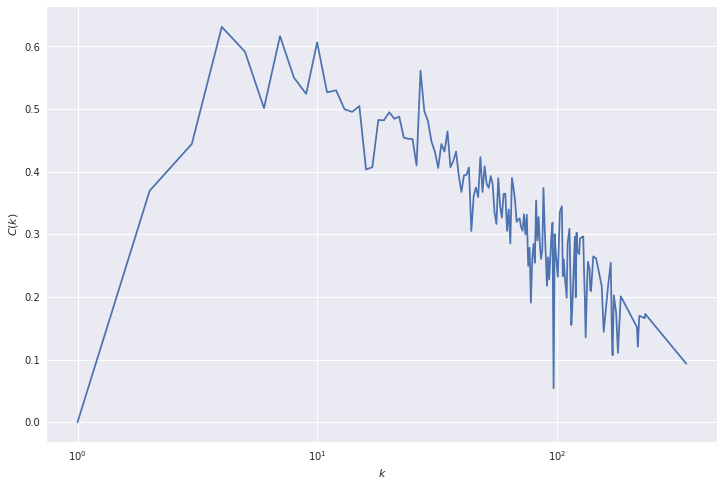

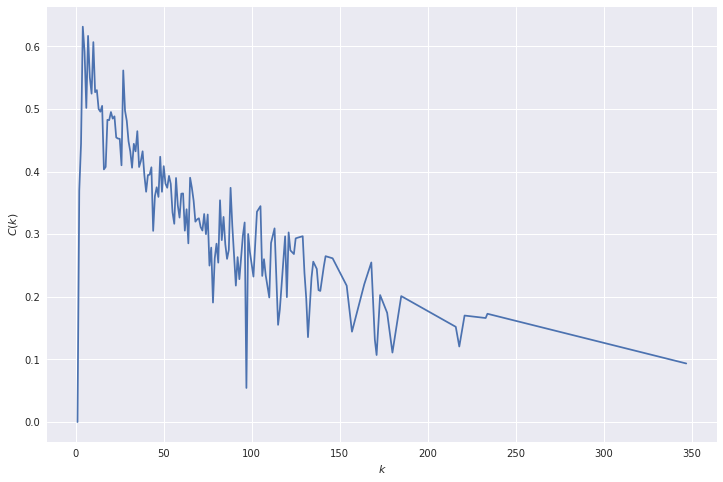

In [7]:
# CC Distribution

def plot_cc_dist(G, degree_hist):
    cc_dict = nx.algorithms.cluster.clustering(G)

    degree_dict = dict(nx.degree(G))

    cc = {} # cc distribution
    for node, degree in degree_dict.items():
        if degree in cc:
            cc[degree] += cc_dict[node]

        else:
            cc[degree] = cc_dict[node]

    for degree in cc:
        cc[degree] = cc[degree] / degree_hist[degree]

    x = list(cc.keys())
    y = list(cc.values())
    x, y = zip(*sorted(zip(x, y)))

    plot_dist(x, y, "$k$", "$C(k)$", True)
    plot_dist(x, y, "$k$", "$C(k)$", False)
    
plot_cc_dist(G, degree_hist)

In [8]:
# Generating Random Graphs
n = G.number_of_nodes()
m = G.number_of_edges()

p = 2 * m / (n * (n - 1))
G_random = nx.generators.gnp_random_graph(n, p)

degree_sequence=list(dict(nx.degree(G)).values())
G_permute = nx.generators.configuration_model(degree_sequence) # This is not preferential attachment
G_permute = nx.Graph(G_permute) # Resulting degree_seq is not same, but hopefully similar

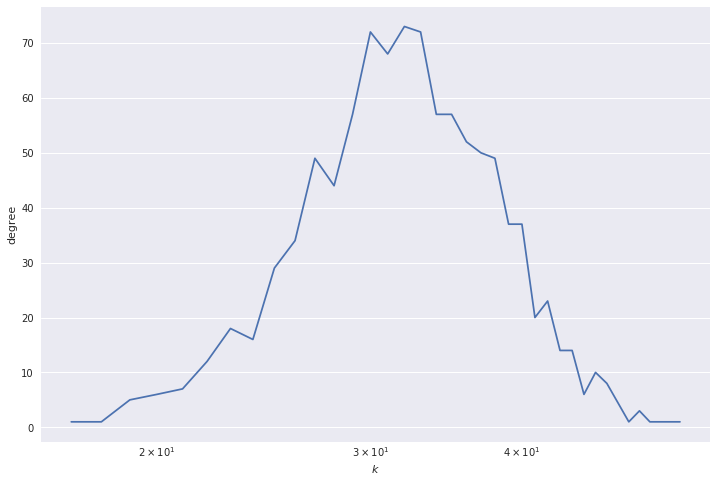

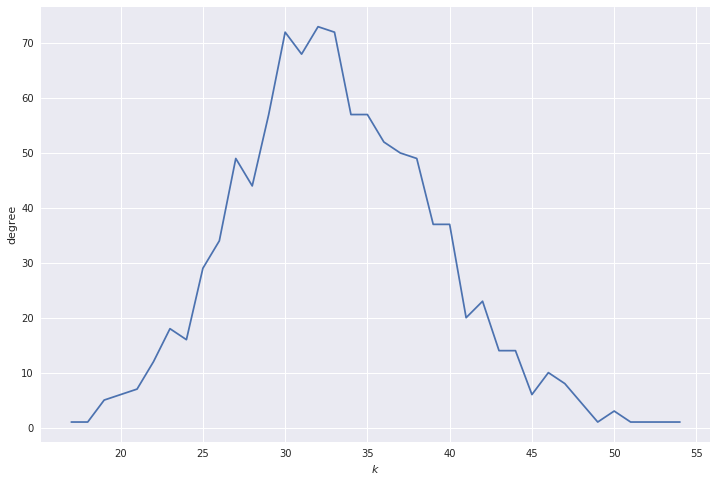

In [9]:
# Degree Distribution of Random Graph
degree_hist = plot_degree_dist(G_random);

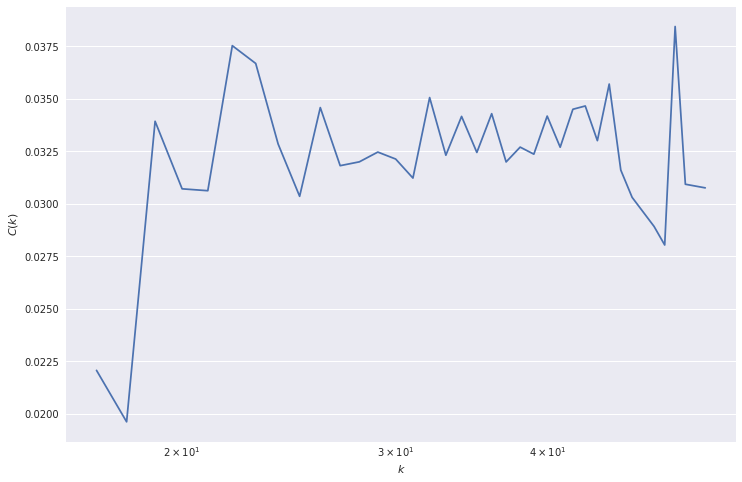

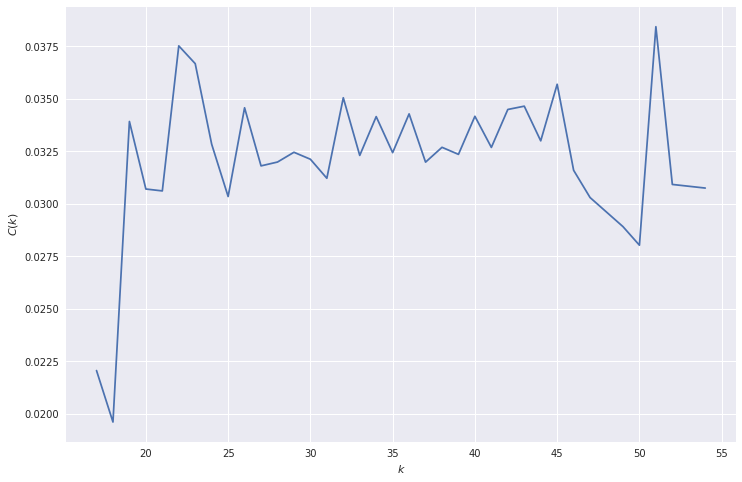

In [10]:
# CC Distribution of Random Graph
plot_cc_dist(G_random, degree_hist)

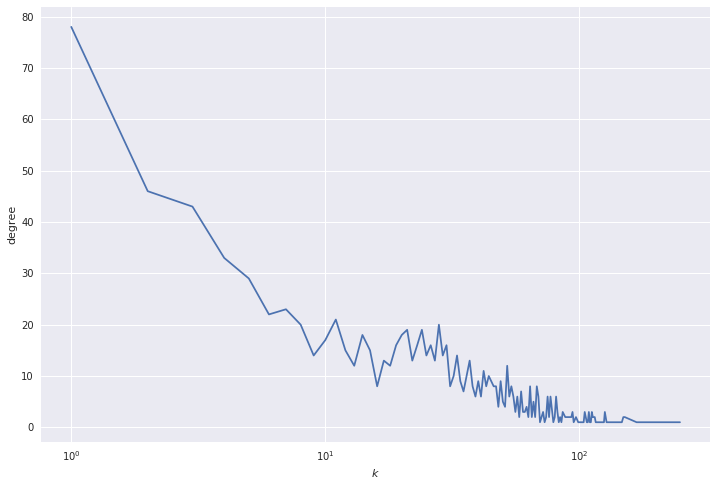

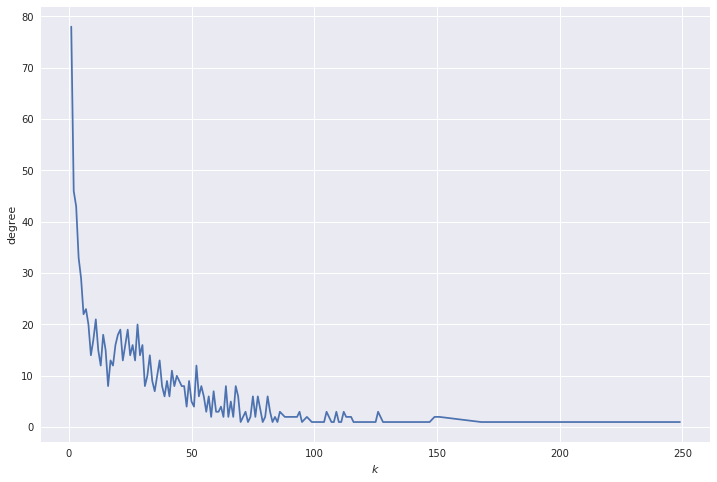

In [11]:
# Degree Distribution of Permuted Graph
degree_hist = plot_degree_dist(G_permute);

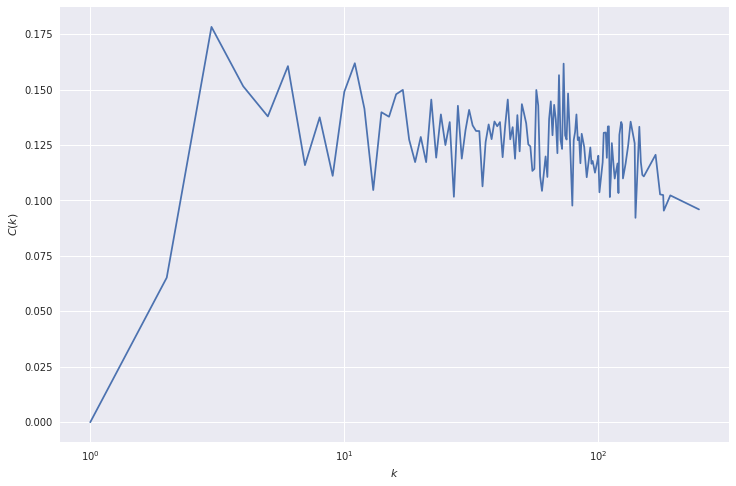

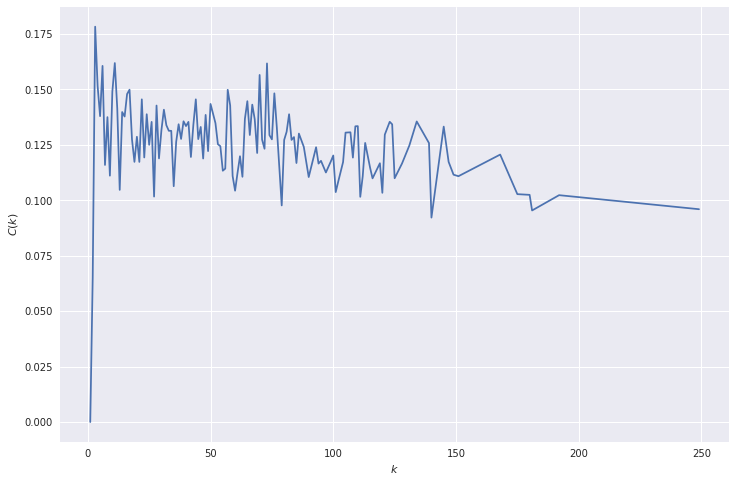

In [12]:
# CC Distribution of Permuted Graph
plot_cc_dist(G_permute, degree_hist)